![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)


# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

### Importar base de datos y librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')  

In [5]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [6]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


### Crear varaible de interés

Text(0.5, 0, 'Probabilidad de toxicidad')

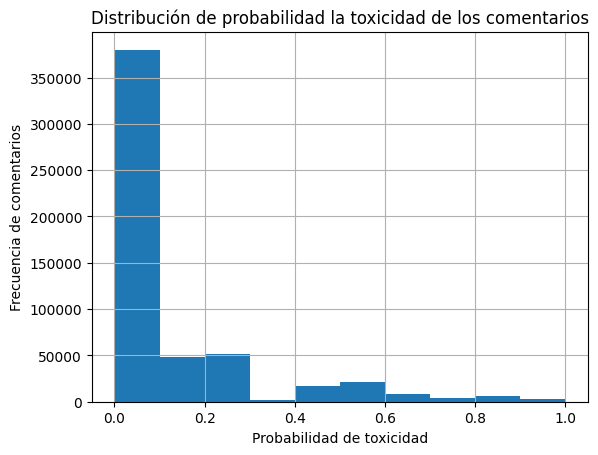

In [11]:
# Impresión histograma de variable de interés (y)
# Como se peude apreciar, el database principalmente contiene comentarios con una baja probabilidad (menor a 0.3) de toxicidad
df.target.hist()
plt.title("Distribución de probabilidad la toxicidad de los comentarios")
plt.ylabel("Frecuencia de comentarios")
plt.xlabel("Probabilidad de toxicidad")

In [10]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [13]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text
X

0         What are you talking about? What group do Pete...
1          NO!, Let him, we need a Conservative government.
2         Perhaps he took the "power out of the Cardinal...
3         As always, yours is dripping with sarcasm, whi...
4         The dirty little secret is that the price rang...
                                ...                        
541457    You wrote: "Both parties campaigned explicitly...
541458    Nowadays. there sure seem to be a lot of credi...
541459    We are lucky wealth filters down to the poor i...
541460    You are half right. Both nature and humans can...
541461    I don't know how you went from yelling at a fo...
Name: comment_text, Length: 541462, dtype: object

In [16]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train

101388    Oral history is what ever they say it is.  Naz...
187598    Marijuana is less harmful to human health, tha...
175087    Look and see how many women are in photos of t...
521167    see like others we stood up to south africa ye...
343059                And next, they'll be coming for ISIS.
                                ...                        
110268    It's sad that BC can only choose between Liber...
259178    I'll stick to the estimates from Walter E. Wil...
365838    Isn't this exactly what Trump (and Obama befor...
131932    "no loyalty to them", I assume you mean.\nExac...
121958    You apparently have not really studied the gos...
Name: comment_text, Length: 362779, dtype: object

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Importación de librerías adicionales
import xgboost as xgb

vectorizer1 = CountVectorizer()
X_train_vectorized = vectorizer1.fit_transform(X_train)
X_test_vectorized = vectorizer1.transform(X_test)

# Modelo XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_jobs=-1, seed=123)
xgb_model.fit(X_train_vectorized, y_train)

# Predicción prob toxicidad
y_pred = xgb_model.predict(X_test_vectorized)

# Cálculo del MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


Mean Squared Error:  0.020749476727491955


In [ ]:
# Visualización de 50 términos en el diccionario de palabras
print(vectorizer1.get_feature_names_out()[-150:-100])

['𝗕𝗲' '𝗙𝗮𝘁𝗵𝗲𝗿' '𝗜𝗳' '𝗦𝗼' '𝗧𝗿𝘂𝗹𝘆' '𝗮𝗻𝗱' '𝗮𝗻𝗻𝗼𝘂𝗻𝗰𝗲' '𝗮𝘀' '𝗯𝗲' '𝗯𝗶𝗹𝗹𝗶𝗼𝗻' '𝗯𝘆'
 '𝗰𝗮𝗿𝗲𝗳𝘂𝗹' '𝗱𝗼' '𝗱𝗼𝗹𝗹𝗮𝗿𝘀' '𝗳𝗿𝗼𝗺' '𝗳𝗿𝗼𝗻𝘁' '𝗳𝘂𝗹𝗹' '𝗴𝗞𝗭𝗘𝗳𝗿𝗪𝟱𝗺𝟳𝗤' '𝗴𝗶𝘃𝗲'
 '𝗵𝗮𝘃𝗲' '𝗵𝗲𝗮𝘃𝗲𝗻' '𝗵𝗼𝗻𝗼𝗿𝗲𝗱' '𝗵𝘁𝘁𝗽𝘀' '𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀' '𝗶𝗻' '𝗶𝘁' '𝗻𝗲𝗲𝗱𝘆' '𝗻𝗼'
 '𝗻𝗼𝘁' '𝗼𝗳' '𝗼𝗻' '𝗼𝘁𝗵𝗲𝗿𝘀' '𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲' '𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱' '𝗿𝗲𝘄𝗮𝗿𝗱' '𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀'
 '𝘀𝗲𝗲𝗻' '𝘀𝘁𝗿𝗲𝗲𝘁𝘀' '𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀' '𝘁𝗲𝗹𝗹' '𝘁𝗵𝗲' '𝘁𝗵𝗲𝗶𝗿' '𝘁𝗵𝗲𝗺' '𝘁𝗵𝗲𝘆' '𝘁𝗼'
 '𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀' '𝘄𝗵𝗲𝗻' '𝘄𝗶𝗹𝗹' '𝘄𝗶𝘁𝗵' '𝘆𝗼𝘂']


Se evidencia que todavía hay oportunidad de limpieza del texto puesto que aparecen expresiones como '𝗴𝗞𝗭𝗘𝗳𝗿𝗪𝟱𝗺𝟳𝗤' que carecen de sentido. 


Ahora, se crea la matriz con las palabras como vienen de la fuente (conservando mayúsculas y minúsculas) para evaluar la diferencia en la métrica de desempeño y verificar si mejora.

In [ ]:
vectorizer2 = CountVectorizer(lowercase=False)
X_train_vectorized2 = vectorizer2.fit_transform(X_train)
X_test_vectorized2 = vectorizer2.transform(X_test)

# Modelo XGBoost Regressor
xgb_model2 = xgb.XGBRegressor(objective ='reg:squarederror', n_jobs=-1, seed=123)
xgb_model2.fit(X_train_vectorized2, y_train)

# Predicción de la probabilidad de toxicidad
y_pred2 = xgb_model2.predict(X_test_vectorized2)

# Cálculo del MSE
mse2 = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error: ", mse2)

Mean Squared Error:  0.0216784577144372


In [ ]:
# Visualización de 50 términos en el diccionario de palabras
print(vectorizer2.get_feature_names_out()[-150:-100])

['𝗕𝗲' '𝗙𝗮𝘁𝗵𝗲𝗿' '𝗜𝗳' '𝗦𝗼' '𝗧𝗿𝘂𝗹𝘆' '𝗮𝗻𝗱' '𝗮𝗻𝗻𝗼𝘂𝗻𝗰𝗲' '𝗮𝘀' '𝗯𝗲' '𝗯𝗶𝗹𝗹𝗶𝗼𝗻' '𝗯𝘆'
 '𝗰𝗮𝗿𝗲𝗳𝘂𝗹' '𝗱𝗼' '𝗱𝗼𝗹𝗹𝗮𝗿𝘀' '𝗳𝗿𝗼𝗺' '𝗳𝗿𝗼𝗻𝘁' '𝗳𝘂𝗹𝗹' '𝗴𝗞𝗭𝗘𝗳𝗿𝗪𝟱𝗺𝟳𝗤' '𝗴𝗶𝘃𝗲'
 '𝗵𝗮𝘃𝗲' '𝗵𝗲𝗮𝘃𝗲𝗻' '𝗵𝗼𝗻𝗼𝗿𝗲𝗱' '𝗵𝘁𝘁𝗽𝘀' '𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀' '𝗶𝗻' '𝗶𝘁' '𝗻𝗲𝗲𝗱𝘆' '𝗻𝗼'
 '𝗻𝗼𝘁' '𝗼𝗳' '𝗼𝗻' '𝗼𝘁𝗵𝗲𝗿𝘀' '𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲' '𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱' '𝗿𝗲𝘄𝗮𝗿𝗱' '𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀'
 '𝘀𝗲𝗲𝗻' '𝘀𝘁𝗿𝗲𝗲𝘁𝘀' '𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀' '𝘁𝗲𝗹𝗹' '𝘁𝗵𝗲' '𝘁𝗵𝗲𝗶𝗿' '𝘁𝗵𝗲𝗺' '𝘁𝗵𝗲𝘆' '𝘁𝗼'
 '𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀' '𝘄𝗵𝗲𝗻' '𝘄𝗶𝗹𝗹' '𝘄𝗶𝘁𝗵' '𝘆𝗼𝘂']



En este modelo se realiza la predicción de la probabilidad de ser un comentario tóxico, para ello se plantea dos formas de tratar el texto, uno es transformando el texto en minúscula y la segunda es dejandolo tal cual viene de la fuente. Lo anterior, arroja los siguientes resultados:



| Punto  | Modelo                                       | MAE     |
|--------|----------------------------------------------|---------|
|    1   | XGBoost (CountVectorizer)                    |  0.0207 |
|    1   | XGBoost (CountVectorizer (lowercase=False))  |  0.0216 |




Los resultados mostrados en la tabla indican que el modelo XGBoost con CountVectorizer tiene un mejor rendimiento en términos de MAE (Error Absoluto Medio) en comparación con el modelo XGBoost con CountVectorizer (lowercase=False).

El hecho de que el modelo que conserva la capitalización del texto tenga un peor rendimiento puede deberse a que las mismas palabras escritas con mayúsculas o minúsculas pueden ser consideradas diferentes por el modelo, lo que puede resultar en una pérdida de información valiosa en el texto. Por otro lado, el modelo que convierte todo el texto a minúsculas puede tener un mejor rendimiento porque no hay distinción entre palabras escritas con mayúsculas y minúsculas, lo que puede aumentar su precisión.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Tokenización con CountVectorizer y trigramas
trigram_vectorizer1 = CountVectorizer(ngram_range=(1, 3))
X_train_trigram_vectorized1 = trigram_vectorizer1.fit_transform(X_train)
X_test_trigram_vectorized1 = trigram_vectorizer1.transform(X_test)

# Modelo XGBoost Regressor
xgb_model_trigram1 = xgb.XGBRegressor(objective ='reg:squarederror', n_jobs=-1,seed=123)
xgb_model_trigram1.fit(X_train_trigram_vectorized1, y_train)

# Predicción de la probabilidad de toxicidad 
y_pred_trigram1 = xgb_model_trigram1.predict(X_test_trigram_vectorized1)

# Cálculo del MSE
mse_trigram1 = mean_squared_error(y_test, y_pred_trigram1)
print("Mean Squared Error con trigramas: ", mse_trigram1)


Mean Squared Error con trigramas:  0.020656004628689325


In [ ]:
# Visualización de 50 términos en el diccionario de palabras
print(trigram_vectorizer1.get_feature_names_out()[-150:-100])

['𝙛𝙖𝙢𝙞𝙡𝙞𝙚𝙨' '𝙛𝙖𝙢𝙞𝙡𝙞𝙚𝙨 𝙖𝙣𝙙' '𝙛𝙖𝙢𝙞𝙡𝙞𝙚𝙨 𝙖𝙣𝙙 𝙡𝙤𝙫𝙚𝙙' '𝙛𝙚𝙬' '𝙛𝙚𝙬 𝙙𝙖𝙮𝙨'
 '𝙛𝙚𝙬 𝙙𝙖𝙮𝙨 it' '𝙝𝙖𝙨' '𝙝𝙖𝙨 𝙗𝙚𝙚𝙣' '𝙝𝙖𝙨 𝙗𝙚𝙚𝙣 𝙚𝙭𝙩𝙚𝙣𝙙𝙚𝙙' '𝙞𝙣' '𝙞𝙣 𝙢𝙚𝙨𝙨𝙖𝙜𝙚'
 '𝙞𝙣 𝙢𝙚𝙨𝙨𝙖𝙜𝙚 𝙖𝙙𝙙𝙧𝙚𝙨𝙨𝙚𝙙' '𝙞𝙣 𝙩𝙝𝙚' '𝙞𝙣 𝙩𝙝𝙚 𝙥𝙖𝙨𝙩' '𝙞𝙣 𝙩𝙝𝙚 𝙬𝙖𝙩𝙚𝙧𝙨' '𝙠𝙚𝙚𝙥'
 '𝙠𝙚𝙚𝙥 my' '𝙠𝙚𝙚𝙥 my job' '𝙡𝙖' '𝙡𝙖 scalia' '𝙡𝙖 scalia if' '𝙡𝙤𝙫𝙚𝙙'
 '𝙡𝙤𝙫𝙚𝙙 𝙤𝙣𝙚𝙨' '𝙡𝙤𝙫𝙚𝙙 𝙤𝙣𝙚𝙨 𝙤𝙛' '𝙢𝙚𝙨𝙨𝙖𝙜𝙚' '𝙢𝙚𝙨𝙨𝙖𝙜𝙚 𝙖𝙙𝙙𝙧𝙚𝙨𝙨𝙚𝙙'
 '𝙢𝙚𝙨𝙨𝙖𝙜𝙚 𝙖𝙙𝙙𝙧𝙚𝙨𝙨𝙚𝙙 𝙩𝙤' '𝙢𝙤𝙩𝙝𝙚𝙧' '𝙢𝙤𝙩𝙝𝙚𝙧 𝙙𝙧𝙪𝙣𝙠' '𝙢𝙤𝙩𝙝𝙚𝙧 𝙙𝙧𝙪𝙣𝙠 𝙤𝙧' '𝙣𝙤'
 '𝙣𝙤 𝙈𝙤𝙨𝙡𝙚𝙢𝙨' '𝙣𝙤 𝙈𝙤𝙨𝙡𝙚𝙢𝙨 𝙪𝙣𝙩𝙞𝙡' '𝙣𝙤𝙩' '𝙣𝙤𝙩 𝙗𝙚' '𝙣𝙤𝙩 𝙗𝙚 𝙪𝙨𝙞𝙣𝙜' '𝙤𝙛'
 '𝙤𝙛 𝙩𝙝𝙚' '𝙤𝙛 𝙩𝙝𝙚 𝙥𝙚𝙧𝙨𝙤𝙣𝙣𝙚𝙡' '𝙤𝙛𝙛' '𝙤𝙛𝙛 𝙩𝙝𝙚' '𝙤𝙛𝙛 𝙩𝙝𝙚 𝙆𝙤𝙧𝙚𝙖𝙣' '𝙤𝙣'
 '𝙤𝙣 𝙗𝙤𝙖𝙧𝙙' '𝙤𝙣 𝙗𝙤𝙖𝙧𝙙 so' '𝙤𝙣𝙚𝙨' '𝙤𝙣𝙚𝙨 𝙤𝙛' '𝙤𝙣𝙚𝙨 𝙤𝙛 𝙩𝙝𝙚' '𝙤𝙣𝙡𝙮'
 '𝙤𝙣𝙡𝙮 𝙖𝙘𝙠𝙣𝙤𝙬𝙡𝙚𝙙𝙜𝙚𝙙']


Ahora, se crea la matriz con las palabras como vienen de la fuente (conservando mayúsculas y minúsculas) para evaluar la diferencia en la métrica de desempeño y verificar si mejora.

In [ ]:
# Tokenización con CountVectorizer y trigramas
trigram_vectorizer2 = CountVectorizer(lowercase=False, ngram_range=(1, 3))
X_train_trigram_vectorized2 = trigram_vectorizer2.fit_transform(X_train)
X_test_trigram_vectorized2 = trigram_vectorizer2.transform(X_test)

# Modelo XGBoost Regressor
xgb_model_trigram2 = xgb.XGBRegressor(objective ='reg:squarederror', n_jobs=-1,seed=123)
xgb_model_trigram2.fit(X_train_trigram_vectorized2, y_train)

# Predicción de la probabilidad de toxicidad 
y_pred_trigram2 = xgb_model_trigram2.predict(X_test_trigram_vectorized2)

# Cálculo del Mean Squared Error (MSE)
mse_trigram2 = mean_squared_error(y_test, y_pred_trigram2)
print("Mean Squared Error con trigramas: ", mse_trigram2)

Mean Squared Error con trigramas:  0.02165532867673772



En este modelo con trigramas se realiza la predicción de la probabilidad de ser un comentario tóxico, para ello se plantean dos formas de tratar el texto, la primera es transformando el texto en minúscula y la segunda es dejandolo tal cual viene de la fuente. Lo anterior, arroja los siguientes resultados:



| Punto | Modelo                                                    | MAE     |
|-------|-----------------------------------------------------------|---------|
|    1  | XGBoost (CountVectorizer)                                 |  0.0207 |
|    1  | XGBoost (CountVectorizer (lowercase=False))               |  0.0216 |
|    2  | XGBoost (CountVectorizer) con trigramas                   |  0.0206 |
|    2  | XGBoost (CountVectorizer (lowercase=False)) con trigramas |  0.0216 |




Estos resultados muestran que la tokenización con trigramas ha mejorado ligeramente la precisión del modelo en comparación con la tokenización sin trigramas. Sin embargo, la diferencia entre usar minúsculas o no parece tener un impacto en el rendimiento del modelo, ya que el MAE aumenta en los modelos entrenados con lowercase=False.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

*TfidfVectorizer* es una función de procesamiento de texto que combina Frecuencia de Término (TF) y Frecuencia Inversa de Documento (IDF) para ponderar palabras según su relevancia tanto en un texto específico como en el conjunto completo de textos analizados. Esta técnica permite reconocer palabras relevantes y únicas en un documento, a diferencia de CountVectorizer, que se enfoca en contar la cantidad de veces que aparecen las palabras, sin considerar su importancia o singularidad.

#### Ventajas de TfidfVectorizer:

* Pondera palabras según su importancia, ayudando a mejorar la capacidad del modelo para generalizar y capturar relaciones significativas.
* Reduce la importancia de palabras comunes, lo que mejora el análisis.



#### Desventajas de TfidfVectorizer:
* Puede ser bastante más costoso computacionalmente que CountVectorizer.
* La ponderación de palabras puede no ser útil o perjudicial en algunos casos.




En resumen, TfidfVectorizer es útil en tareas de NLP donde es importante capturar la importancia relativa de las palabras. CountVectorizer puede ser más apropiado cuando el enfoque principal es contar palabras en documentos pequeños o especializados.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Tokenización con TfidfVectorizer
tfidf_vectorizer1 = TfidfVectorizer()
X_train_tfidf_vectorized1 = tfidf_vectorizer1.fit_transform(X_train)
X_test_tfidf_vectorized1 = tfidf_vectorizer1.transform(X_test)

  # Modelo XGBoost
xgb_model_tfidf1 = xgb.XGBRegressor(objective ='reg:squarederror', n_jobs=-1,seed=123)
xgb_model_tfidf1.fit(X_train_tfidf_vectorized1, y_train)

# Predicción de la probabilidad de toxicidad
y_pred_tfidf1 = xgb_model_tfidf1.predict(X_test_tfidf_vectorized1)

# Cálculo (MSE)
mse_tfidf1 = mean_squared_error(y_test, y_pred_tfidf1)
print("Mean Squared Error con TfidfVectorizer: ", mse_tfidf1)

Mean Squared Error con TfidfVectorizer:  0.020343818478258637


In [ ]:
# Visualización de 50 términos en el diccionario de palabras
print(tfidf_vectorizer1.get_feature_names_out()[-150:-100])

['𝗕𝗲' '𝗙𝗮𝘁𝗵𝗲𝗿' '𝗜𝗳' '𝗦𝗼' '𝗧𝗿𝘂𝗹𝘆' '𝗮𝗻𝗱' '𝗮𝗻𝗻𝗼𝘂𝗻𝗰𝗲' '𝗮𝘀' '𝗯𝗲' '𝗯𝗶𝗹𝗹𝗶𝗼𝗻' '𝗯𝘆'
 '𝗰𝗮𝗿𝗲𝗳𝘂𝗹' '𝗱𝗼' '𝗱𝗼𝗹𝗹𝗮𝗿𝘀' '𝗳𝗿𝗼𝗺' '𝗳𝗿𝗼𝗻𝘁' '𝗳𝘂𝗹𝗹' '𝗴𝗞𝗭𝗘𝗳𝗿𝗪𝟱𝗺𝟳𝗤' '𝗴𝗶𝘃𝗲'
 '𝗵𝗮𝘃𝗲' '𝗵𝗲𝗮𝘃𝗲𝗻' '𝗵𝗼𝗻𝗼𝗿𝗲𝗱' '𝗵𝘁𝘁𝗽𝘀' '𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀' '𝗶𝗻' '𝗶𝘁' '𝗻𝗲𝗲𝗱𝘆' '𝗻𝗼'
 '𝗻𝗼𝘁' '𝗼𝗳' '𝗼𝗻' '𝗼𝘁𝗵𝗲𝗿𝘀' '𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲' '𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱' '𝗿𝗲𝘄𝗮𝗿𝗱' '𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀'
 '𝘀𝗲𝗲𝗻' '𝘀𝘁𝗿𝗲𝗲𝘁𝘀' '𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀' '𝘁𝗲𝗹𝗹' '𝘁𝗵𝗲' '𝘁𝗵𝗲𝗶𝗿' '𝘁𝗵𝗲𝗺' '𝘁𝗵𝗲𝘆' '𝘁𝗼'
 '𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀' '𝘄𝗵𝗲𝗻' '𝘄𝗶𝗹𝗹' '𝘄𝗶𝘁𝗵' '𝘆𝗼𝘂']


Ahora, se crea la matriz con las palabras como vienen de la fuente (conservando mayúsculas y minúsculas) para evaluar la diferencia en la métrica de desempeño y verificar si mejora.

In [ ]:
# Tokenización con TfidfVectorizer
tfidf_vectorizer2 = TfidfVectorizer(lowercase=False)
X_train_tfidf_vectorized2 = tfidf_vectorizer2.fit_transform(X_train)
X_test_tfidf_vectorized2 = tfidf_vectorizer2.transform(X_test)

  # Modelo XGBoost
xgb_model_tfidf2 = xgb.XGBRegressor(objective ='reg:squarederror', n_jobs=-1,seed=123)
xgb_model_tfidf2.fit(X_train_tfidf_vectorized2, y_train)

# Predicción de la probabilidad de toxicidad
y_pred_tfidf2 = xgb_model_tfidf2.predict(X_test_tfidf_vectorized2)

# Cálculo (MSE)
mse_tfidf2 = mean_squared_error(y_test, y_pred_tfidf2)
print("Mean Squared Error con TfidfVectorizer: ", mse_tfidf2)

Mean Squared Error con TfidfVectorizer:  0.02145565867434081



En este modelo con TfidfVectorizer se realiza la predicción de la probabilidad de ser un comentario tóxico, para ello se plantea dos formas de tratar el texto, uno es transformando el texto en minúscula y la segunda es dejandolo tal cual viene de la fuente. Lo anterior, arroja los siguientes resultados:



| Punto | Modelo                                                    | MAE     |
|-------|-----------------------------------------------------------|---------|
|    1  | XGBoost (CountVectorizer)                                 |  0.0207 |
|    1  | XGBoost (CountVectorizer (lowercase=False))               |  0.0216 |
|    2  | XGBoost (CountVectorizer) con trigramas                   |  0.0206 |
|    2  | XGBoost (CountVectorizer (lowercase=False)) con trigramas |  0.0216 |
|    4  | XGBoost (TfidfVectorizer)                                 |  0.0203 |
|    4  | XGBoost (TfidfVectorizer (lowercase=False))               |  0.0214 |

Estos resultados muestran que el modelo que utiliza TfidfVectorizer (con y sin minúsculas) produce un MAE ligeramente más bajo que los modelos que utilizan CountVectorizer. Como se explicó en el punto 3, TfidfVectorizer es una técnica de vectorización de términos que pondera los términos en función de su frecuencia en el documento y en la colección de documentos, lo que significa que los términos que aparecen con frecuencia en un documento pero raramente en otros documentos tendrán una puntuación alta.

Estos resultados sugieren que TfidfVectorizer es un método de vectorización de términos más efectivo que CountVectorizer para este conjunto de datos. Sin embargo, la diferencia en el MAE es bastante pequeña entre los modelos que utilizan TfidfVectorizer y los modelos que utilizan CountVectorizer con trigramas.



## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

Mean Squared Error con CountVectorizer (unigramas) :  0.020749476727491955
Mean Squared Error con CountVectorizer (unigramas) lowercase=False:  0.0216784577144372
Mean Squared Error con CountVectorizer (trigramas):  0.020656004628689325
Mean Squared Error con CountVectorizer (trigramas) lowercase=False:  0.02165532867673772
Mean Squared Error con TfidfVectorizer:  0.020343818478258637
Mean Squared Error con TfidfVectorizer (lowercase=False):  0.02145565867434081
              


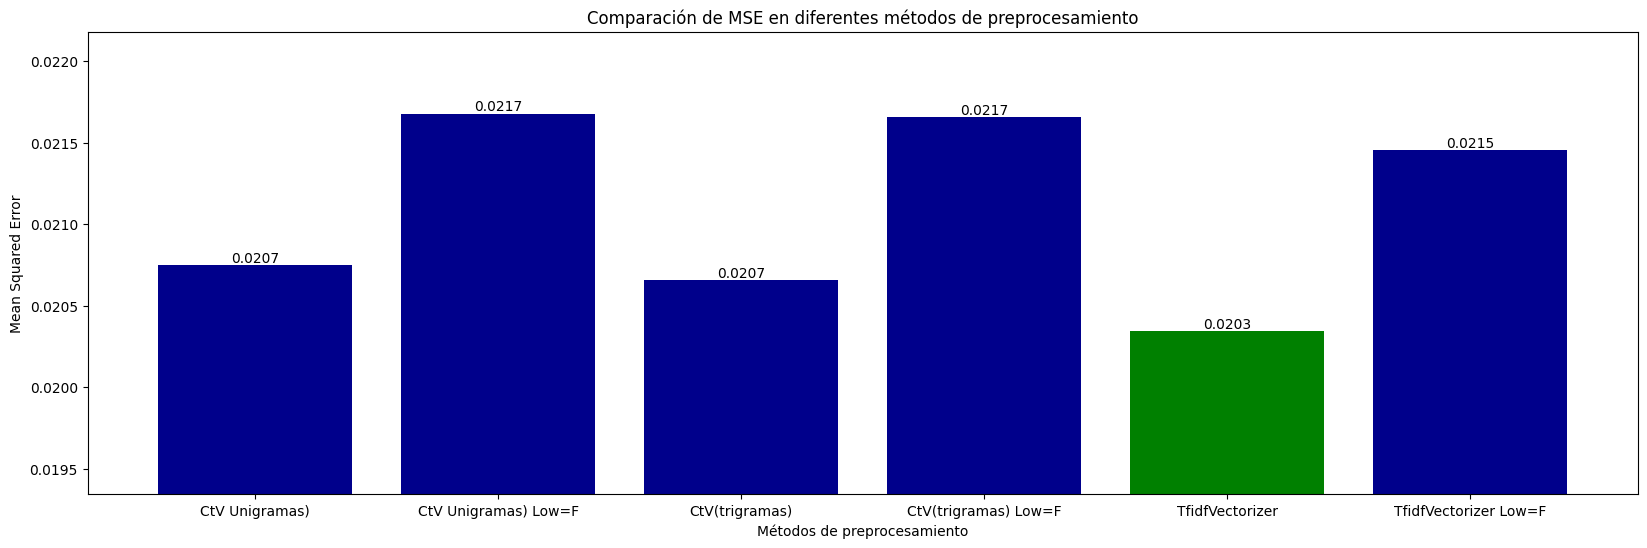

In [ ]:
print("Mean Squared Error con CountVectorizer (unigramas) : ", mse)
print("Mean Squared Error con CountVectorizer (unigramas) lowercase=False: ", mse2)
print("Mean Squared Error con CountVectorizer (trigramas): ", mse_trigram1)
print("Mean Squared Error con CountVectorizer (trigramas) lowercase=False: ", mse_trigram2)
print("Mean Squared Error con TfidfVectorizer: ", mse_tfidf1)
print("Mean Squared Error con TfidfVectorizer (lowercase=False): ", mse_tfidf2)

print("              ")
import matplotlib.pyplot as plt



mse_values = [mse,mse2, mse_trigram1,mse_trigram2, mse_tfidf1,mse_tfidf2]
labels = ["CtV Unigramas)","CtV Unigramas) Low=F", "CtV(trigramas)", "CtV(trigramas) Low=F", "TfidfVectorizer",  "TfidfVectorizer Low=F" ]

min_mse_index = mse_values.index(min(mse_values))
bar_colors = ["darkblue" if i != min_mse_index else "green" for i in range(len(mse_values))]
plt.figure(figsize=(20, 6))

plt.bar(labels, mse_values, color=bar_colors)
plt.xlabel("Métodos de preprocesamiento")
plt.ylabel("Mean Squared Error")
plt.title("Comparación de MSE en diferentes métodos de preprocesamiento")

# lim eje y
min_mse = min(mse_values)
max_mse = max(mse_values)
for x, y in zip(labels, mse_values):
    plt.annotate(str(round(y, 4)), xy=(x, y), ha='center', va='bottom')

padding = 0.001
plt.ylim(min_mse - padding, max_mse + 0.0005)

plt.show()


Al comparar los resultados de MSE de los diferentes modelos, podemos observar cómo el preprocesamiento de texto influye en el rendimiento. Aunque los resultados podrían variar si se utilizara un modelo diferente al XGBoost, se pueden destacar algunas tendencias generales:

CountVectorizer (unigramas): Este enfoque básico puede funcionar bien en ciertos casos, pero también puede verse afectado por ruido y palabras comunes no relevantes. El modelo puede ser influenciado por palabras de alta frecuencia que no impactan significativamente en la predicción de toxicidad.

CountVectorizer (trigramas): Al incorporar bigramas y trigramas, el modelo es capaz de capturar relaciones más complejas en el texto, mejorando así su rendimiento. Sin embargo, el aumento en características puede llevar a mayor tiempo de entrenamiento y posiblemente a sobreajuste si el conjunto de datos es pequeño.

TfidfVectorizer: Al ponderar palabras según su importancia en el texto y en el conjunto de textos, TfidfVectorizer potencia la capacidad del modelo para capturar relaciones más significativas. Esta técnica funciona bien en tareas donde la relevancia de las palabras es crucial, pero puede ser más costosa computacionalmente que CountVectorizer.

En este caso, se aprecia la diferencia en el desempeño de los modelos utilizando diferentes técnicas. Como se esperaba, TfidfVectorizer presenta el mejor desempeño, seguido de CountVectorizer (trigramas). No obstante, es importante evaluar si la mejora en el rendimiento justifica el esfuerzo computacional y el tiempo de ejecución adicional si se deseara colocar el modelo en producción.